In [105]:
import numpy as np 
import matplotlib.pylab as plt
import winsound
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy import signal


In [10]:
def stop_music():
    winsound.PlaySound(None,0)
    

In [83]:
winsound.PlaySound('Papa Roach - Blood Brothers.wav', winsound.SND_ASYNC)

In [90]:
samplerate, data = wavfile.read('Papa Roach - Blood Brothers.wav')

In [36]:
atraso = np.concatenate([np.zeros([1*samplerate]),np.ones(1)])

In [42]:
convol =  np.convolve(data[:,0],atraso)

In [45]:
data[:,0] = convol[0:-atraso.size+1]

In [91]:
data2 = data[60*samplerate:63*samplerate,:]

In [97]:
data3 = np.copy(data2)
data3[:,1] = data3[:,0]/2+data3[:,1]/2
data3[:,0] = data3[:,1]


In [98]:
wavfile.write("ala.wav", samplerate, data3)

In [99]:
winsound.PlaySound('ala.wav', winsound.SND_ASYNC)

In [101]:
N = 2**14
DATA = fft(data2[:,1],N)
FreqSig = fftfreq(N,1/samplerate)

(-1000.0, 1000.0, -100000000.0, 100000000.0)

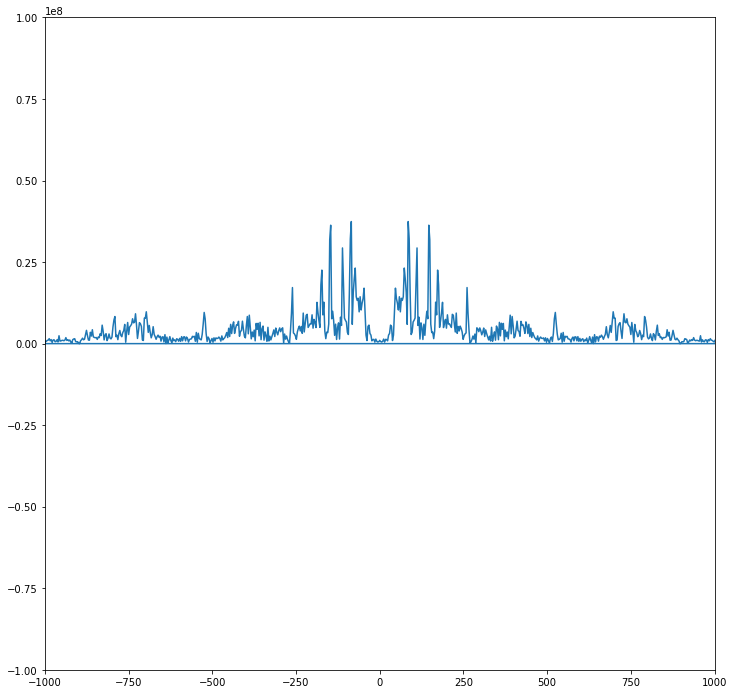

In [111]:
plt.figure(figsize = (12,12))
plt.plot(FreqSig,np.abs(DATA))
plt.axis([-1000,1000,-1*10**8 ,1*10**8])

In [319]:
numtaps = 501
freqwindow = 2*np.array([180])/samplerate
pass_zero = 'lowpass'
coef_b1  = signal.firwin(numtaps,freqwindow,pass_zero = pass_zero, window = "hann") 
coef_a = 1
#coef_b1, coef_a = signal.butter(1, freqwindow)
data3 = signal.lfilter(coef_b1, coef_a, data2/4, axis = 0).astype('int16')
data3[:,0] = signal.filtfilt(coef_b1,coef_a, data2[:,0])
data3[:,1] = signal.filtfilt(coef_b1,coef_a, data2[:,1])
data3 = data3
data3 = data3.astype('int16')

In [320]:

wavfile.write("ala.wav", samplerate, data3)
winsound.PlaySound('ala.wav', winsound.SND_ASYNC)

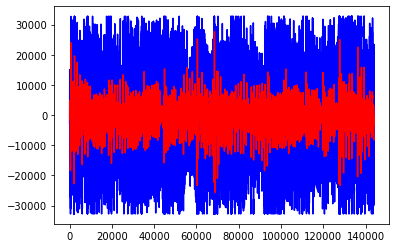

In [308]:
plt.plot(data2[:,1],'b')
plt.plot(data3[:,1],'r')


In [272]:
coef_b1

array([3.28603015e-05, 9.85809046e-05, 9.85809046e-05, 3.28603015e-05])

In [213]:
2**16

65536